 Handling Outliers in the Boston Housing Dataset

In [4]:
import pandas as pd
# Load the dataset
file_path = r'E:\data set\HousingData.csv'
boston_data = pd.read_csv(file_path)
boston_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


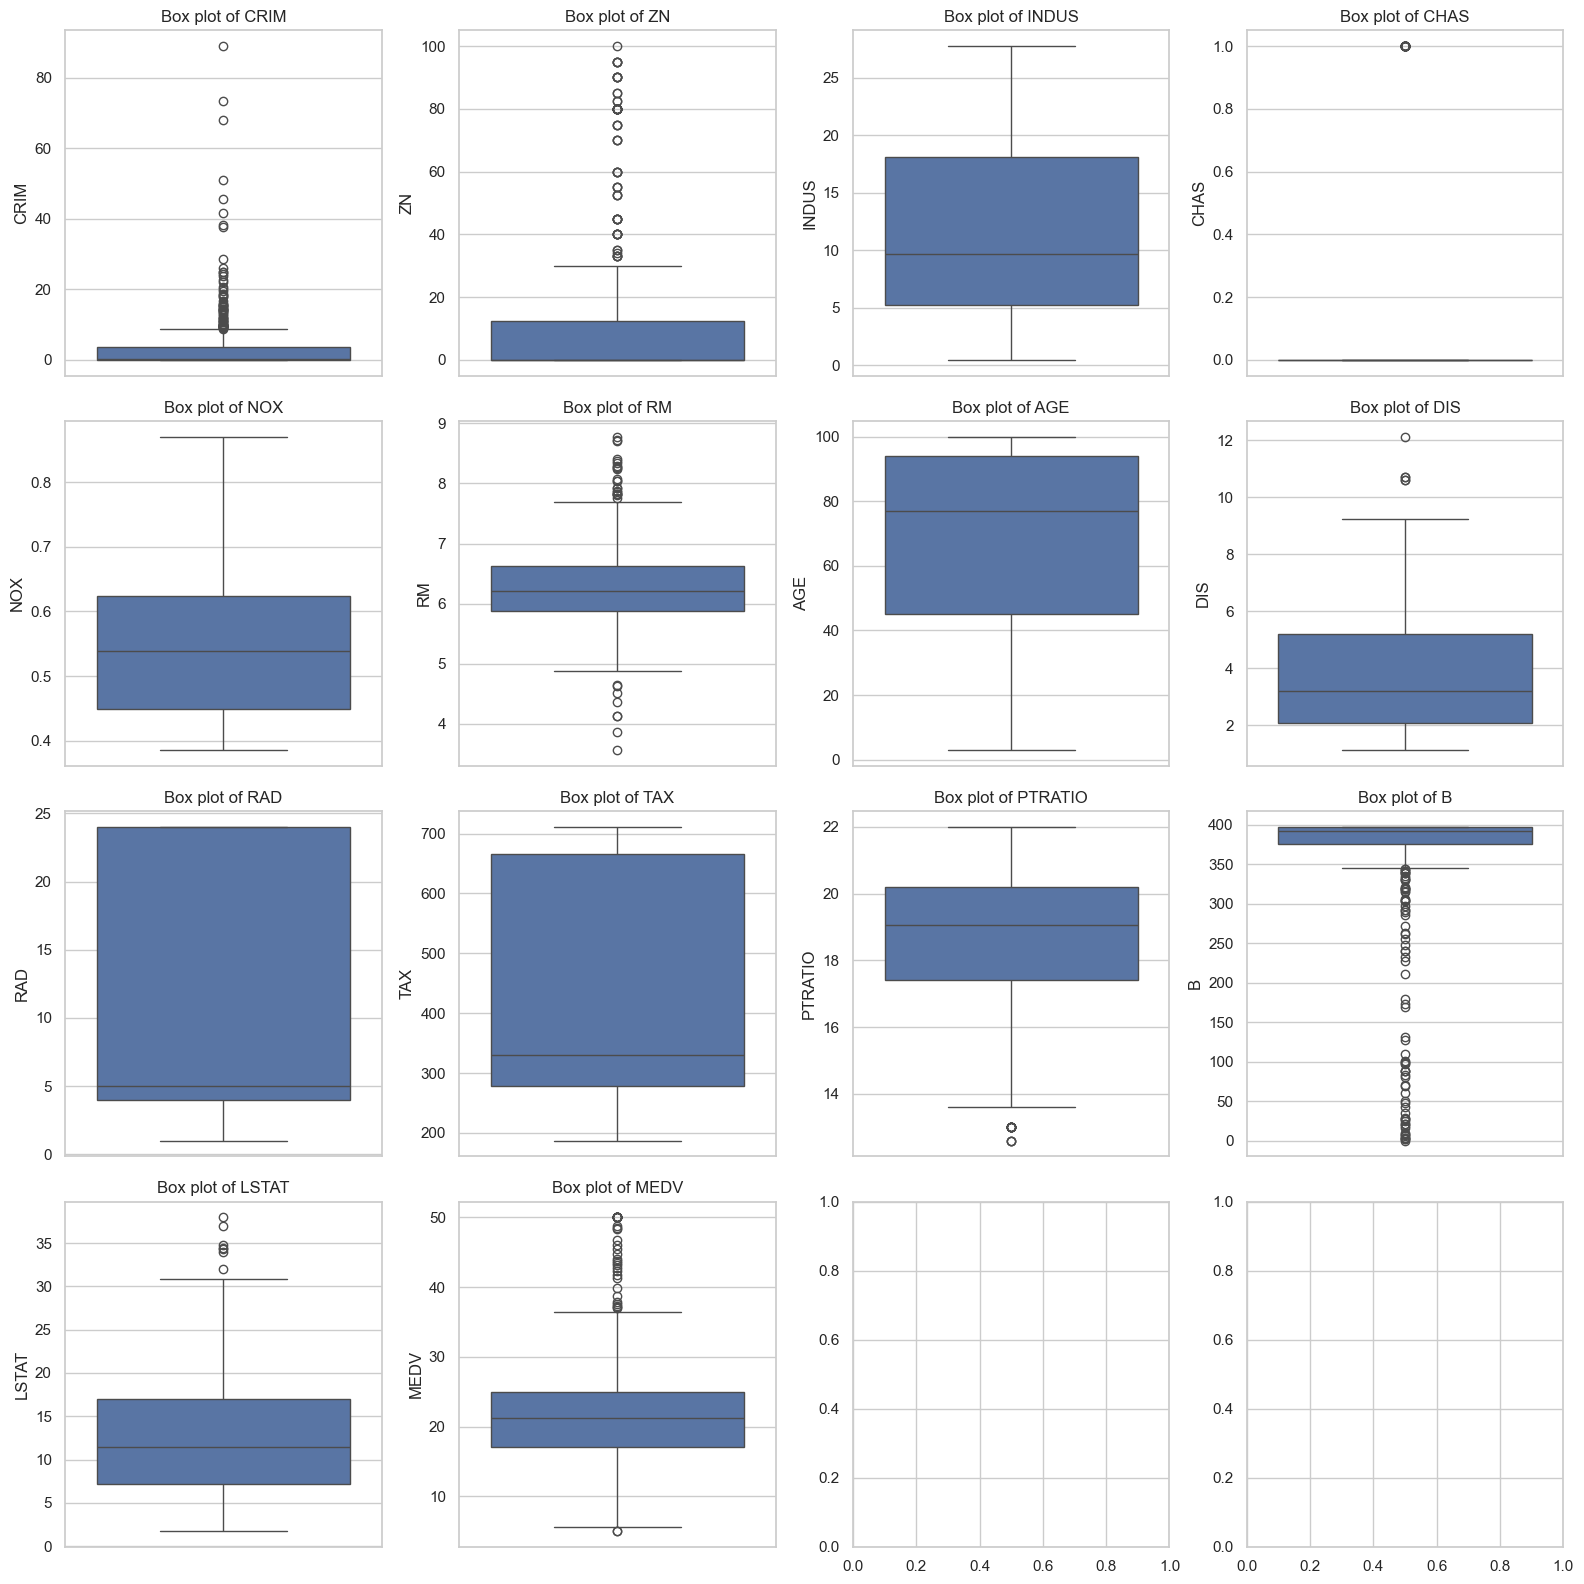

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Plot box plots for each feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for idx, col in enumerate(boston_data.columns):
    sns.boxplot(y=boston_data[col], ax=axes[idx//4, idx%4])
    axes[idx//4, idx%4].set_title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


Identify Outliers using Z-score

In [8]:
from scipy.stats import zscore
z_scores = zscore(boston_data)

# Identify outliers
outliers = (z_scores > 3) | (z_scores < -3)

outlier_counts = outliers.sum(axis=0)
print("Outlier counts for each feature using Z-score:")
print(outlier_counts)


Outlier counts for each feature using Z-score:
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
B          25
LSTAT       0
MEDV        0
dtype: int64


Identify Outliers using IQR

In [9]:
# Calculate IQR
Q1 = boston_data.quantile(0.25)
Q3 = boston_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = (boston_data < (Q1 - 1.5 * IQR)) | (boston_data > (Q3 + 1.5 * IQR))

outlier_counts_iqr = outliers_iqr.sum(axis=0)
print("Outlier counts for each feature using IQR:")
print(outlier_counts_iqr)


Outlier counts for each feature using IQR:
CRIM       65
ZN         63
INDUS       0
CHAS       34
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
MEDV       40
dtype: int64


 Handle Outliers

Removing Outliers using Z-score

In [10]:
# Remove outliers using Z-score
boston_data_no_outliers_zscore = boston_data[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

# Display the shape of the dataset before and after removing outliers
print("Shape before removing outliers using Z-score:", boston_data.shape)
print("Shape after removing outliers using Z-score:", boston_data_no_outliers_zscore.shape)


Shape before removing outliers using Z-score: (506, 14)
Shape after removing outliers using Z-score: (0, 14)


Removing Outliers using IQR

In [11]:
# Remove outliers using IQR
boston_data_no_outliers_iqr = boston_data[~((boston_data < (Q1 - 1.5 * IQR)) | (boston_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the dataset before and after removing outliers
print("Shape before removing outliers using IQR:", boston_data.shape)
print("Shape after removing outliers using IQR:", boston_data_no_outliers_iqr.shape)


Shape before removing outliers using IQR: (506, 14)
Shape after removing outliers using IQR: (273, 14)
